# Analyze and forecast stock prices (e.g., AAPL, MSFT, GOOG, AMZN) using Python (Pandas, Matplotlib, etc.).



In [2]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [84]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Set symbols and date range
symbols = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end_date = datetime.now()
start_date = end_date - timedelta(days=30)

# Download all company data at once
df = yf.download(symbols, start=start_date, end=end_date, group_by='ticker')


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5132\246796636.py:11: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  4 of 4 completed


In [85]:
# Stack and reset index
df = df.stack(level=1, future_stack=True).reset_index()

# Check how many columns are present
print("Column names are:", df.columns)
print("Total number of columns:", len(df.columns))


Column names are: Index(['Date', 'Price', 'GOOG', 'MSFT', 'AMZN', 'AAPL'], dtype='object', name='Ticker')
Total number of columns: 6


In [86]:
# Assume df is your current DataFrame
df_long = df.melt(id_vars=['Date', 'Price'], 
                  var_name='Company', 
                  value_name='Value')

# Optional: Pivot so you get separate columns for Open, Close, etc.
df_final = df_long.pivot(index=['Date', 'Company'], columns='Price', values='Value').reset_index()

# Clean column names
df_final.columns.name = None

# Display the final structured data
print(df_final.head(10))


        Date Company       Close        High         Low        Open  \
0 2025-05-28    AAPL  200.419998  202.729996  199.899994  200.589996   
1 2025-05-28    AMZN  204.720001  207.660004  204.410004  205.919998   
2 2025-05-28    GOOG  173.171860  176.268129  172.807292  173.771130   
3 2025-05-28    MSFT  457.359985  462.519989  456.929993  461.220001   
4 2025-05-29    AAPL  199.949997  203.809998  198.509995  203.580002   
5 2025-05-29    AMZN  205.699997  208.809998  204.229996  208.029999   
6 2025-05-29    GOOG  172.752365  175.189423  171.573774  174.789909   
7 2025-05-29    MSFT  458.679993  461.720001  455.309998  461.549988   
8 2025-05-30    AAPL  200.850006  201.960007  196.779999  199.369995   
9 2025-05-30    AMZN  205.009995  205.990005  201.699997  204.839996   

       Volume  
0  45339700.0  
1  28549800.0  
2  25999200.0  
3  17086300.0  
4  51396800.0  
5  34650000.0  
6  21233600.0  
7  13974800.0  
8  70819900.0  
9  51679400.0  


In [87]:
df_final.sort_values(by=['Date', 'Company'], inplace=True)


In [88]:
df

Ticker,Date,Price,GOOG,MSFT,AMZN,AAPL
0,2025-05-28,Open,1.737711e+02,4.612200e+02,2.059200e+02,2.005900e+02
1,2025-05-28,High,1.762681e+02,4.625200e+02,2.076600e+02,2.027300e+02
2,2025-05-28,Low,1.728073e+02,4.569300e+02,2.044100e+02,1.999000e+02
3,2025-05-28,Close,1.731719e+02,4.573600e+02,2.047200e+02,2.004200e+02
4,2025-05-28,Volume,2.599920e+07,1.708630e+07,2.854980e+07,4.533970e+07
...,...,...,...,...,...,...
100,2025-06-26,Open,1.733850e+02,4.929800e+02,2.131200e+02,2.014300e+02
101,2025-06-26,High,1.744400e+02,4.969600e+02,2.168650e+02,2.026150e+02
102,2025-06-26,Low,1.708601e+02,4.929300e+02,2.120100e+02,1.994600e+02
103,2025-06-26,Close,1.742050e+02,4.965950e+02,2.166800e+02,2.007000e+02


In [89]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


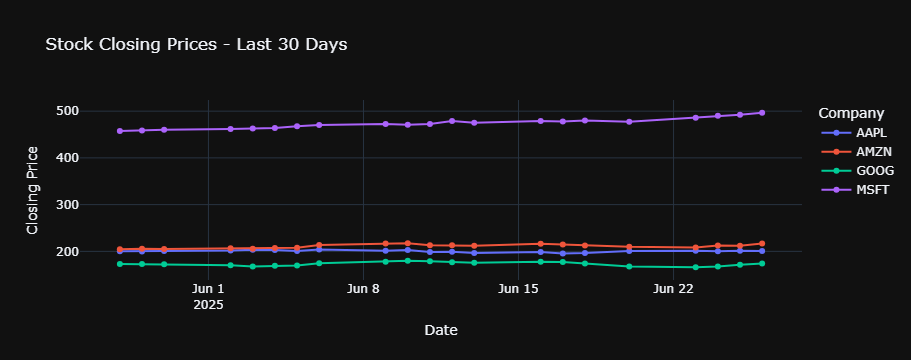

In [90]:
import plotly.express as px

# Assuming your final combined DataFrame is df_final
fig = px.line(df_final, x='Date', y='Close', color='Company',
              title='Stock Closing Prices - Last 30 Days',
              markers=True)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Company',
    template='plotly_dark'  # You can also try 'plotly_white', 'ggplot2', etc.
)

fig.show()


In [91]:
df_final.groupby('Company')['Close'].agg(['max', 'min', 'mean', 'std'])


,max,min,mean,std
Company,,,,
AAPL,203.919998,195.639999,200.371905,2.221754
AMZN,217.610001,204.720001,211.079525,4.233637
GOOG,180.009995,166.009995,173.111837,4.162785
MSFT,496.595001,457.359985,473.961187,11.176639


## LSTM for Stock Price Prediction

In [92]:
pip install tensorflow scikit-learn matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Use just the 'Date' and 'AAPL' columns
aapl_data = df[['Date', 'AAPL']].copy()
aapl_data.rename(columns={'AAPL': 'Close'}, inplace=True)
aapl_data.set_index('Date', inplace=True)

# Normalize the 'Close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(aapl_data)

# Create sequences
X = []
y = []
sequence_length = 60

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape for LSTM input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

print(" Data ready for LSTM: ", X.shape, y.shape)


 Data ready for LSTM:  (24, 60, 1) (24,)


In [111]:
print(df['AAPL'].describe())
print(df['AAPL'].sort_values(ascending=False).head(10))


count     84.000000
mean     200.659584
std        2.636646
min      195.070007
25%      198.915005
50%      200.625000
75%      202.628754
max      206.240005
Name: AAPL, dtype: float64
26    206.240005
41    206.000000
36    205.699997
31    204.750000
51    204.500000
40    204.389999
46    204.350006
38    203.919998
6     203.809998
21    203.770004
Name: AAPL, dtype: float64


In [113]:
df = df[df['AAPL'] < 2000]
df

Ticker,Date,Price,GOOG,MSFT,AMZN,AAPL
0,2025-05-28,Open,173.771130,461.220001,205.919998,200.589996
1,2025-05-28,High,176.268129,462.519989,207.660004,202.729996
2,2025-05-28,Low,172.807292,456.929993,204.410004,199.899994
3,2025-05-28,Close,173.171860,457.359985,204.720001,200.419998
5,2025-05-29,Open,174.789909,461.549988,208.029999,203.580002
...,...,...,...,...,...,...
98,2025-06-25,Close,171.490005,492.269989,211.990005,201.559998
100,2025-06-26,Open,173.384995,492.980011,213.119995,201.429993
101,2025-06-26,High,174.440002,496.959991,216.865005,202.615005
102,2025-06-26,Low,170.860107,492.929993,212.009995,199.460007


In [114]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Step 1: Define the input shape
input_shape = (X.shape[1], 1)

model = Sequential()

# First LSTM layer with return_sequences=True so next LSTM gets sequences
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.3))

# Second LSTM layer
model.add(LSTM(units=80, return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer (last one with return_sequences=False)
model.add(LSTM(units=50))
model.add(Dropout(0.3))

# Dense output layer
model.add(Dense(units=1))


# Step 3: Compile
model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [115]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                       │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 60, 80)              │          41,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 60, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 50)                  │          26,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 78,571 (306.92 KB)

 Trainable params: 78,571 (306.92 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
history = model.fit(X, y, epochs=25, batch_size=16, validation_split=0.1, verbose=1)


Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 349ms/step - loss: 0.2310 - val_loss: 0.1173
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1306 - val_loss: 0.0161
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0738 - val_loss: 0.0394
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0882 - val_loss: 0.0160
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0674 - val_loss: 0.0208
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0621 - val_loss: 0.0286
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0758 - val_loss: 0.0258
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0657 - val_loss: 0.0188
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0548 - val_loss: 0.0146
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0569 - val_loss: 0.0181
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0540 - val_loss: 0.0253
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0484 - val_loss: 0.0278


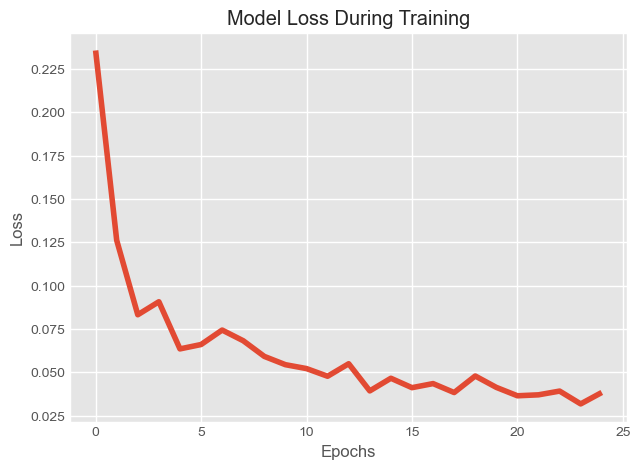

In [121]:
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [122]:
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Convert back to real price
real_prices = scaler.inverse_transform(y.reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


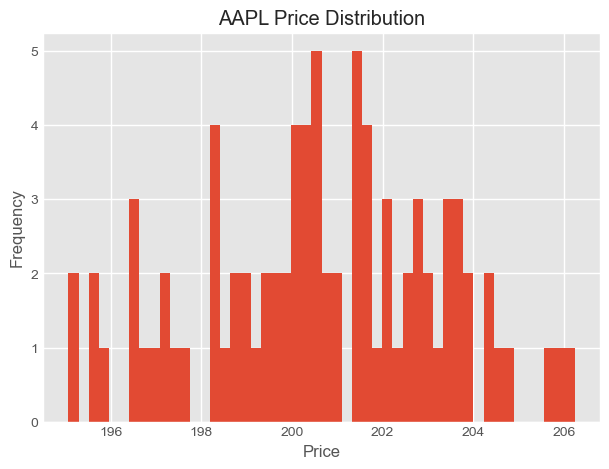

In [123]:
df['AAPL'].hist(bins=50)
plt.title("AAPL Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


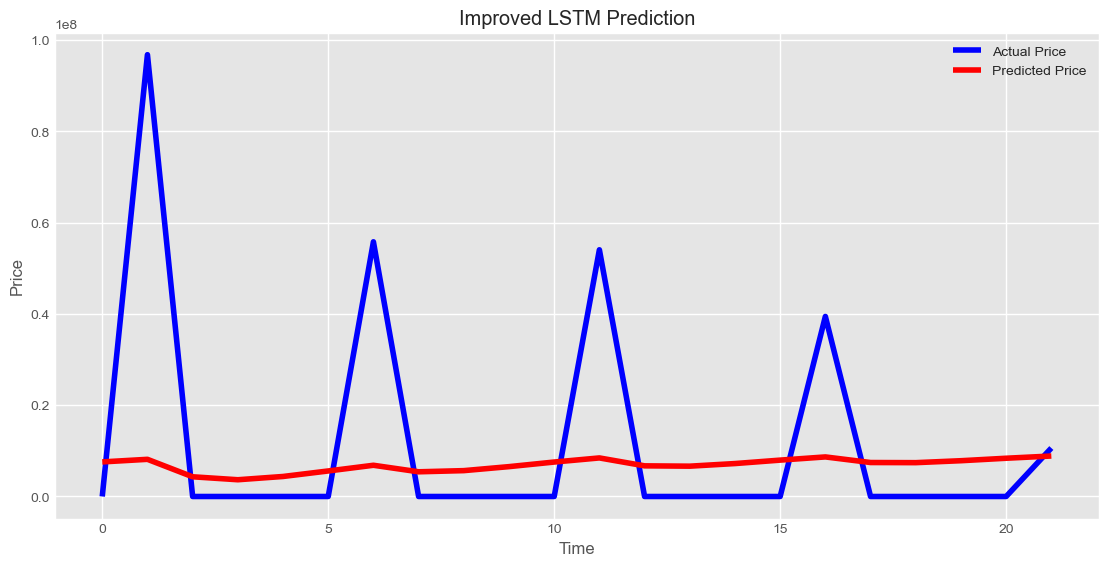

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='red')
plt.title('Improved LSTM Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
